# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


In [3]:
url = 'https://raw.githubusercontent.com/dimagambino/CxC-W24-EY/main/EY%20Wildfires.csv'
wildfire_data = pd.read_csv(url)

In [4]:
wildfire_data.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,6/28/21 22:26,0.01,7/1/21 13:26,10.00,NaN,NaN,7/1/21 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,3/30/21 14:30,0.01,3/30/21 14:30,0.01,3/30/21 14:35,0.01,4/9/21 8:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,4/16/21 16:57,0.10,4/16/21 16:57,0.10,NaN,NaN,4/17/21 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,4/17/21 15:20,0.01,4/17/21 15:20,0.01,NaN,NaN,4/17/21 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,4/1/21 19:10,7.13,4/2/21 11:00,7.13,4/2/21 15:52,7.13,4/12/21 14:30,7.13


 ## Variables With Incomplete Data

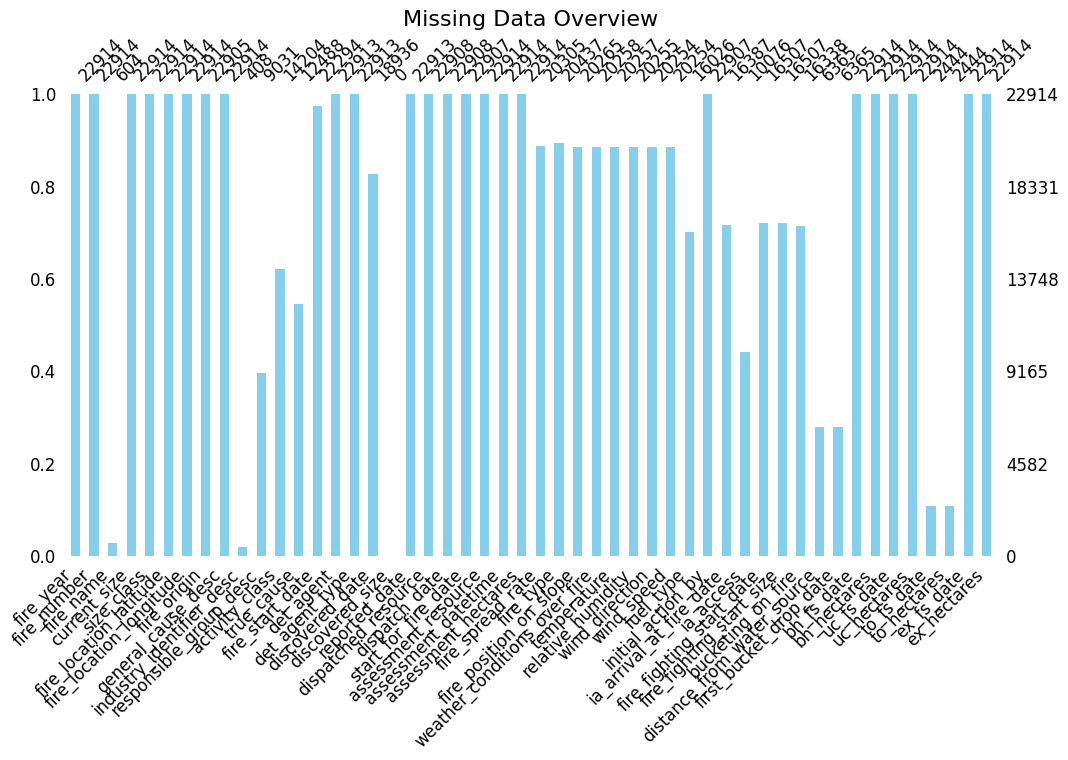

In [11]:
import missingno as msno

# Assuming your DataFrame is named df
msno.bar(wildfire_data, figsize=(12, 6), color='skyblue', fontsize=12, labels=True)
plt.title('Missing Data Overview', fontsize=16)
plt.show()

Variables with missing data: ['fire_name', 'fire_origin', 'industry_identifier_desc', 'responsible_group_desc', 'activity_class', 'true_cause', 'fire_start_date', 'det_agent', 'det_agent_type', 'discovered_date', 'discovered_size', 'reported_date', 'dispatched_resource', 'dispatch_date', 'start_for_fire_date', 'fire_spread_rate', 'fire_type', 'fire_position_on_slope', 'weather_conditions_over_fire', 'temperature', 'relative_humidity', 'wind_direction', 'wind_speed', 'fuel_type', 'initial_action_by', 'ia_arrival_at_fire_date', 'ia_access', 'fire_fighting_start_date', 'fire_fighting_start_size', 'bucketing_on_fire', 'distance_from_water_source', 'first_bucket_drop_date', 'to_fs_date', 'to_hectares']


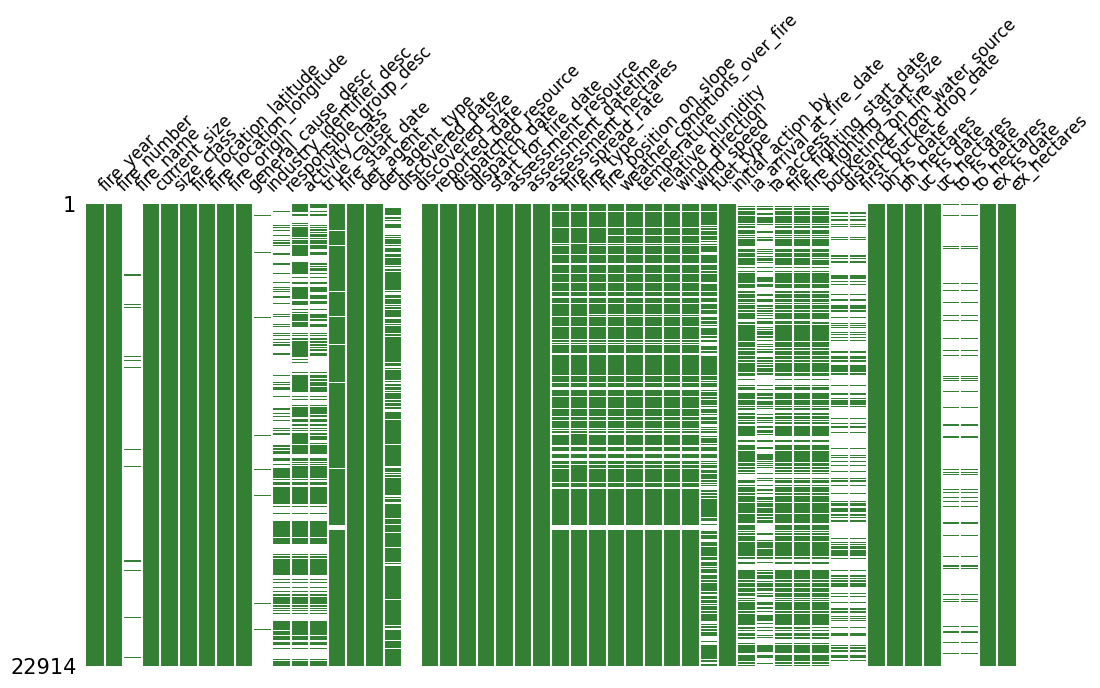

In [12]:
msno.matrix(wildfire_data, figsize=(12, 6), color=(0.2, 0.5, 0.2), fontsize=12, sparkline=False)

# Display the variables with missing data
variables_with_missing_data = wildfire_data.columns[wildfire_data.isnull().any()].tolist()
print("Variables with missing data:", variables_with_missing_data)

In [14]:
# List variables with at least one null value
columns_with_null = wildfire_data.columns[wildfire_data.isnull().any()]

# Display the list
print("Columns with at least one null value:")
print(columns_with_null)

Columns with at least one null value:
Index(['fire_name', 'fire_origin', 'industry_identifier_desc',
       'responsible_group_desc', 'activity_class', 'true_cause',
       'fire_start_date', 'det_agent', 'det_agent_type', 'discovered_date',
       'discovered_size', 'reported_date', 'dispatched_resource',
       'dispatch_date', 'start_for_fire_date', 'fire_spread_rate', 'fire_type',
       'fire_position_on_slope', 'weather_conditions_over_fire', 'temperature',
       'relative_humidity', 'wind_direction', 'wind_speed', 'fuel_type',
       'initial_action_by', 'ia_arrival_at_fire_date', 'ia_access',
       'fire_fighting_start_date', 'fire_fighting_start_size',
       'bucketing_on_fire', 'distance_from_water_source',
       'first_bucket_drop_date', 'to_fs_date', 'to_hectares'],
      dtype='object')


In [15]:
null_counts = wildfire_data.isnull().sum()

# Create a DataFrame with column names and their corresponding null counts
null_info = pd.DataFrame({'Column': null_counts.index, 'Null Count': null_counts.values})

# Sort the DataFrame by null counts in descending order
sorted_null_info = null_info.sort_values(by='Null Count', ascending=False)

# Display the sorted information
print("Columns with null values and their counts:")
print(sorted_null_info)

Columns with null values and their counts:
                          Column  Null Count
17               discovered_size       22914
9       industry_identifier_desc       22506
2                      fire_name       22310
47                   to_hectares       20470
46                    to_fs_date       20470
40    distance_from_water_source       16549
41        first_bucket_drop_date       16549
10        responsible_group_desc       13883
36                     ia_access       12838
12                    true_cause       10426
11                activity_class        8710
33                     fuel_type        6888
39             bucketing_on_fire        6576
35       ia_arrival_at_fire_date        6527
37      fire_fighting_start_date        6407
38      fire_fighting_start_size        6407
16               discovered_date        3978
32                    wind_speed        2660
31                wind_direction        2660
30             relative_humidity        2659
29          

In [14]:
# Extract the region information from the 'fire_number' column
wildfire_data['region'] = wildfire_data['fire_number'].str[0]

# Create a map centered around Alberta
map_alberta = folium.Map(location=[53.9333, -116.5765], zoom_start=6)

# Create a MarkerCluster for the markers
marker_cluster = MarkerCluster().add_to(map_alberta)

# Choose colors for each area
colors = {'C': 'blue', 'E': 'green', 'H': 'red', 'G': 'purple', 'L': 'orange',
          'M': 'brown', 'P': 'pink', 'R': 'gray', 'S': 'cyan', 'W': 'olive'}

# Plot the starting position of each wildfire
for _, row in wildfire_data.iterrows():
    region_info = region_mapping.get(row['fire_number'][0])
    if region_info:
        folium.Marker(
            location=[row['fire_location_latitude'], row['fire_location_longitude']],
            popup=f"{region_info} - {row['fire_name']}",
            icon=folium.Icon(color=colors[row['fire_number'][0]])
        ).add_to(marker_cluster)

# Save the map as an HTML file
map_alberta.save("wildfires_map.html")

C:\Users\dimag\AppData\Local\Temp\ipykernel_26228\2462034050.py:21: UserWarning: color argument of Icon should be one of: {'pink', 'darkgreen', 'lightgray', 'black', 'cadetblue', 'purple', 'green', 'lightblue', 'lightgreen', 'white', 'orange', 'darkred', 'blue', 'darkpurple', 'darkblue', 'red', 'beige', 'lightred', 'gray'}.
  icon=folium.Icon(color=colors[row['fire_number'][0]])


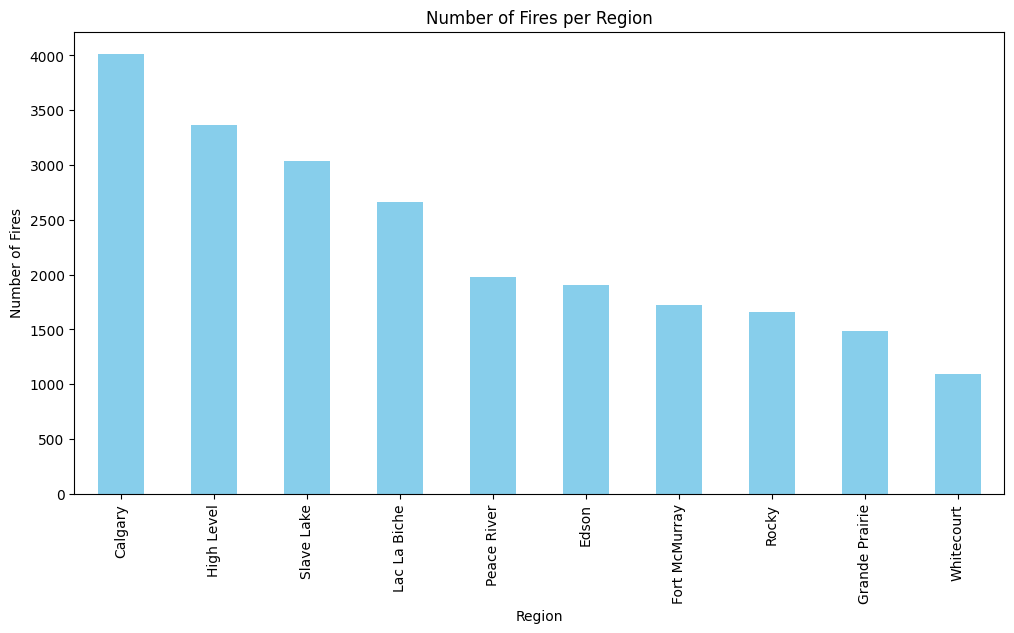

In [21]:
# Mapping region codes to full names
region_mapping = {
    'C': 'Calgary',
    'E': 'Edson',
    'H': 'High Level',
    'G': 'Grande Prairie',
    'L': 'Lac La Biche',
    'M': 'Fort McMurray',
    'P': 'Peace River',
    'R': 'Rocky',
    'S': 'Slave Lake',
    'W': 'Whitecourt'
}

# Extract the first letter from 'fire_number' to get the region code
wildfire_data['region'] = wildfire_data['fire_number'].str[0]

# Map region codes to full names
wildfire_data['region_name'] = wildfire_data['region'].map(region_mapping)

# Plotting the number of fires per region
fires_per_region = wildfire_data['region_name'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
fires_per_region.plot(kind='bar', color='skyblue')
plt.title('Number of Fires per Region')
plt.xlabel('Region')
plt.ylabel('Number of Fires')
plt.show()

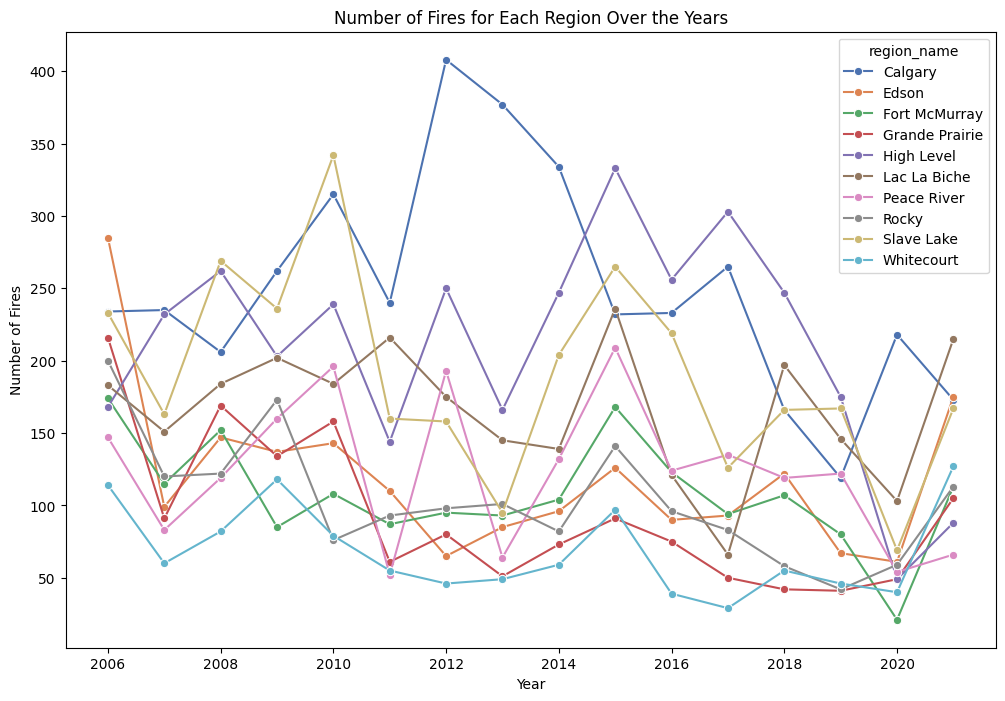

In [24]:
# Extracting the year from 'fire_year'
wildfire_data['year'] = pd.to_datetime(wildfire_data['fire_year'], format='%Y').dt.year

# Counting the number of fires for each region and year
fires_per_region_year = wildfire_data.groupby(['region_name', 'year']).size().reset_index(name='fire_count')

# Getting the top 5 areas with the most fires for each year
top5_areas_per_year = fires_per_region_year.groupby('year').apply(lambda x: x.nlargest(5, 'fire_count')).reset_index(drop=True)

# Plotting the data using a line graph with points for each region
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='fire_count', hue='region_name', marker='o', data=fires_per_region_year, palette='deep')
plt.title('Number of Fires for Each Region Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()

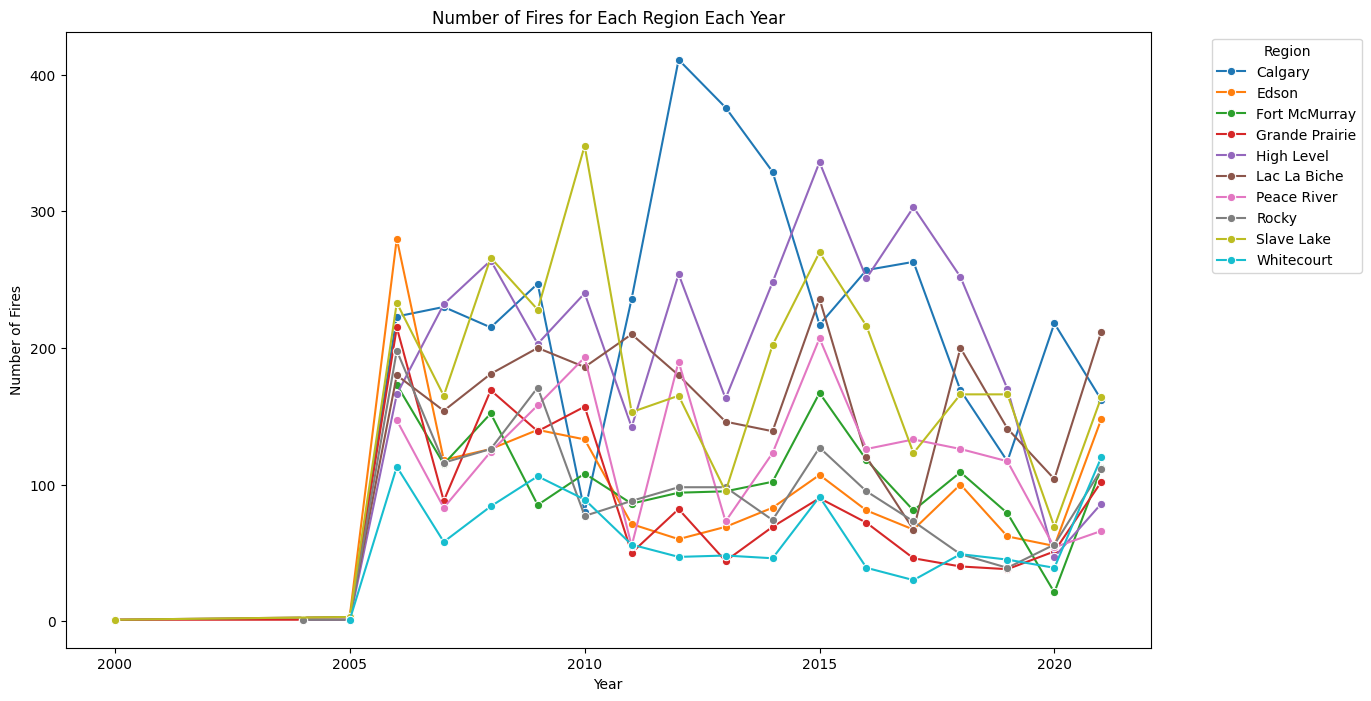

In [32]:
wildfire_data['fire_start_date'] = pd.to_datetime(wildfire_data['fire_start_date'], errors='coerce')

# Extracting the year from 'fire_start_date'
wildfire_data['year'] = wildfire_data['fire_start_date'].dt.year

# Counting the number of fires for each region and year
fires_per_region_year = wildfire_data.groupby(['region_name', 'year']).size().reset_index(name='fire_count')

# Plotting the data using a seaborn line and point plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='fire_count', hue='region_name', marker='o', data=fires_per_region_year)
plt.title('Number of Fires for Each Region Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

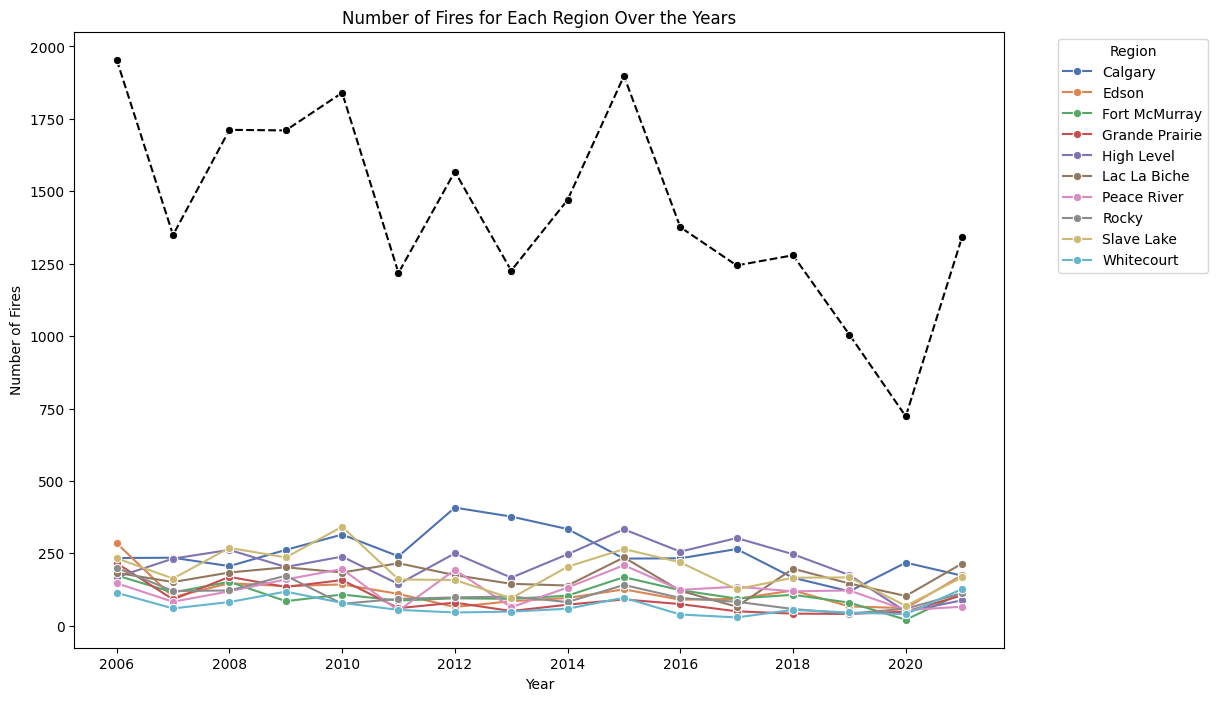

In [25]:
wildfire_data['fire_start_date'] = pd.to_datetime(wildfire_data['fire_start_date'], errors='coerce')

# Extracting the year from 'fire_year'
wildfire_data['year'] = pd.to_datetime(wildfire_data['fire_year'], format='%Y').dt.year

# Counting the number of fires for each region and year
fires_per_region_year = wildfire_data.groupby(['region_name', 'year']).size().reset_index(name='fire_count')

# Counting the total number of fires each year
total_fires_per_year = wildfire_data.groupby('year').size().reset_index(name='total_fire_count')

# Getting the top 5 areas with the most fires for each year
top5_areas_per_year = fires_per_region_year.groupby('year').apply(lambda x: x.nlargest(5, 'fire_count')).reset_index(drop=True)

# Plotting the data using a line graph with points for each region and a line for total fires each year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='fire_count', hue='region_name', marker='o', data=fires_per_region_year, palette='deep')
sns.lineplot(x='year', y='total_fire_count', color='black', linestyle='--', marker='o', data=total_fires_per_year)
plt.title('Number of Fires for Each Region Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

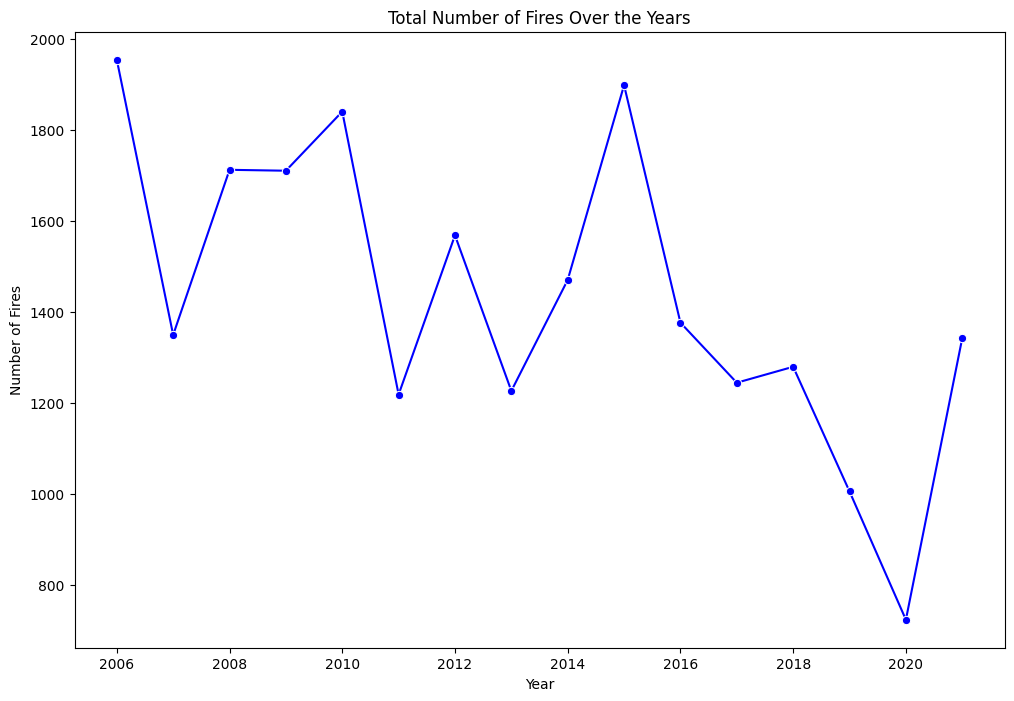

In [26]:
# Extracting the year from 'fire_year'
wildfire_data['year'] = pd.to_datetime(wildfire_data['fire_year'], format='%Y').dt.year

# Counting the total number of fires each year
total_fires_per_year = wildfire_data.groupby('year').size().reset_index(name='total_fire_count')

# Plotting the data using a line graph for the total number of fires each year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='total_fire_count', marker='o', data=total_fires_per_year, color='blue')
plt.title('Total Number of Fires Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()

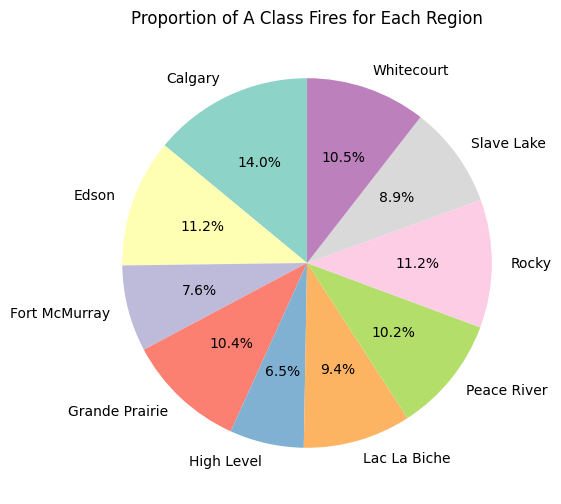

In [58]:
# Calculate the total number of A class fires for each region
total_a_class_counts = wildfire_data[wildfire_data['size_class'] == 'A']['region_name'].value_counts()

# Calculate the percentage of A class fires for each region
percentage_a_class = total_a_class_counts / total_counts * 100

# Replace NaN values with 0 (in case there are regions with no A class fires)
percentage_a_class = percentage_a_class.fillna(0)

# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(percentage_a_class, labels=percentage_a_class.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Proportion of A Class Fires for Each Region')
plt.show()

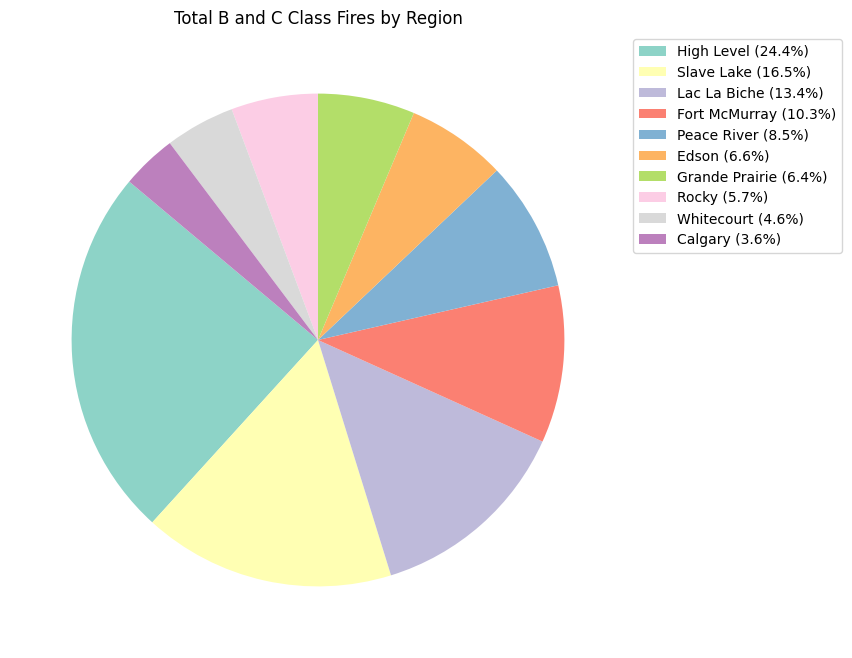

In [42]:
# Assuming 'size_class' column contains values like 'B' and 'C'
b_c_fires = wildfire_data[wildfire_data['size_class'].isin(['B', 'C'])]

# Grouping by region and summing up the fire counts
grouped_data = b_c_fires.groupby('region_name').size().reset_index(name='total_fires')

# Sorting in descending order
grouped_data = grouped_data.sort_values(by='total_fires', ascending=False)

# Plotting the pie chart without labels on the chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors  # You can change the color scheme as needed
patches, _ = plt.pie(
    grouped_data['total_fires'],
    labels=None,  # No labels on the chart
    startangle=140,
    colors=colors,
)

# Format legend with percentage only
legend_labels = [f"{label} ({p:.1f}%)" for label, p in zip(grouped_data['region_name'], 100 * grouped_data['total_fires'] / grouped_data['total_fires'].sum())]
plt.legend(patches, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Total B and C Class Fires by Region')
plt.show()

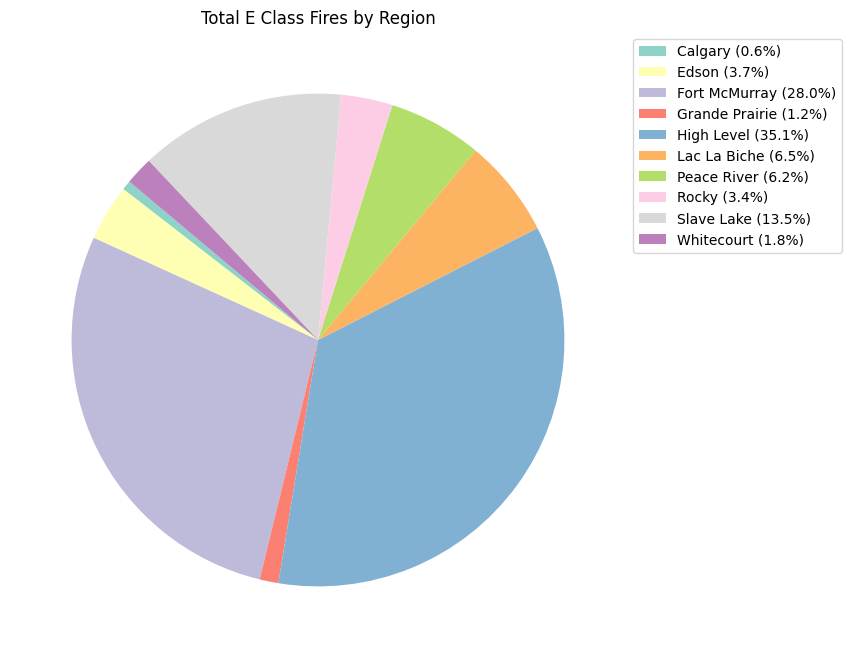

In [43]:
# Assuming 'size_class' column contains values like 'E'
e_fires = wildfire_data[wildfire_data['size_class'] == 'E']

# Grouping by region and summing up the fire counts
grouped_data = e_fires.groupby('region_name').size().reset_index(name='total_fires')

# Plotting the pie chart without labels on the chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors  # You can change the color scheme as needed
patches, _ = plt.pie(
    grouped_data['total_fires'],
    labels=None,  # No labels on the chart
    startangle=140,
    colors=colors,
)

# Format legend with percentage only
legend_labels = [f"{label} ({p:.1f}%)" for label, p in zip(grouped_data['region_name'], 100 * grouped_data['total_fires'] / grouped_data['total_fires'].sum())]
plt.legend(patches, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Total E Class Fires by Region')
plt.show()

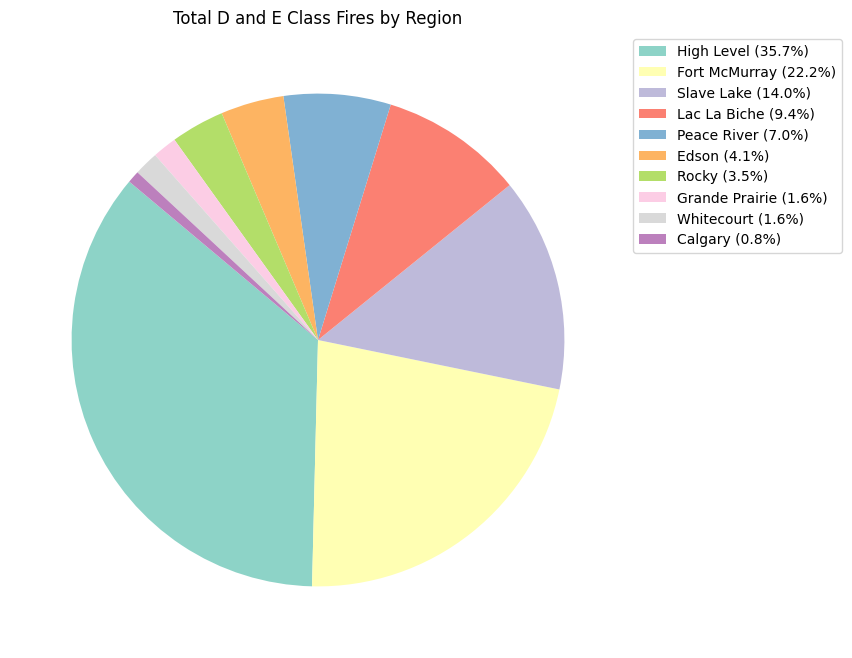

In [40]:
# Assuming 'size_class' column contains values like 'D' and 'E'
d_e_fires = wildfire_data[wildfire_data['size_class'].isin(['D', 'E'])]

# Grouping by region and summing up the fire counts
grouped_data = d_e_fires.groupby('region_name').size().reset_index(name='total_fires')

# Sorting in descending order
grouped_data = grouped_data.sort_values(by='total_fires', ascending=False)

# Plot without labels
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors  # color scheme
patches, _ = plt.pie(
    grouped_data['total_fires'],
    labels=None,  # No labels
    startangle=140,
    colors=colors,
)

# Format legend (% only // no total number)
legend_labels = [f"{label} ({p:.1f}%)" for label, p in zip(grouped_data['region_name'], 100 * grouped_data['total_fires'] / grouped_data['total_fires'].sum())]
plt.legend(patches, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Total D and E Class Fires by Region')
plt.show()

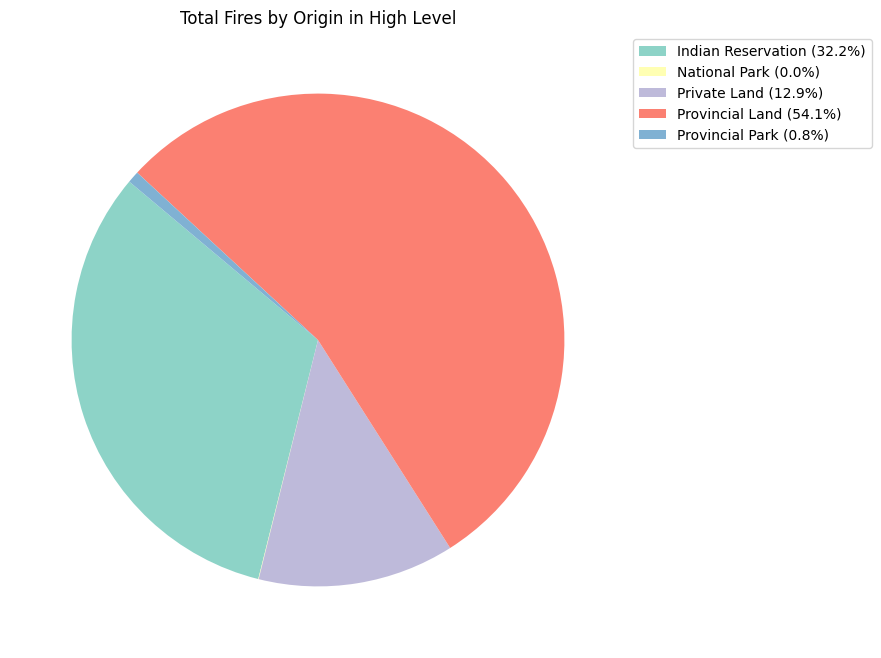

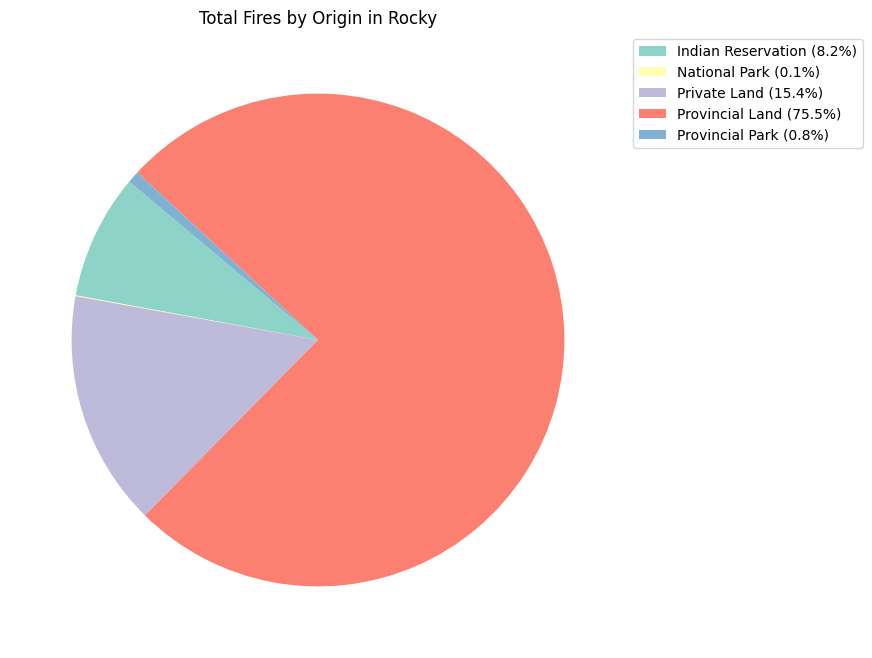

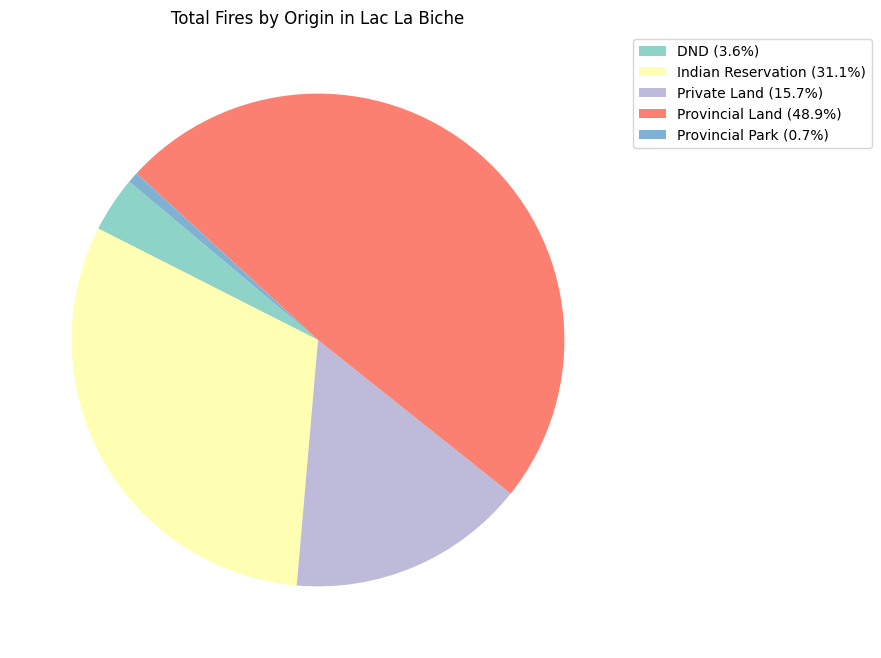

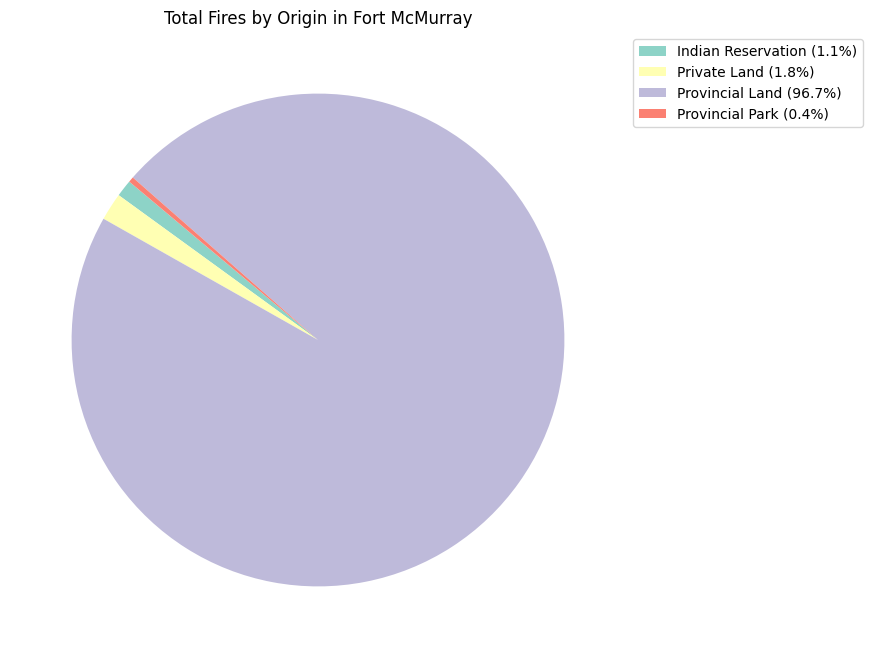

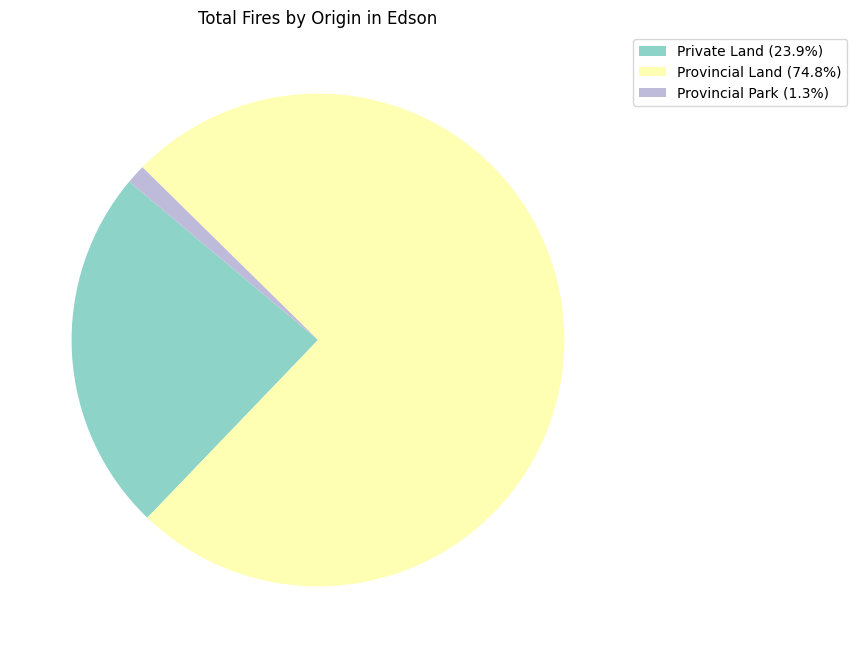

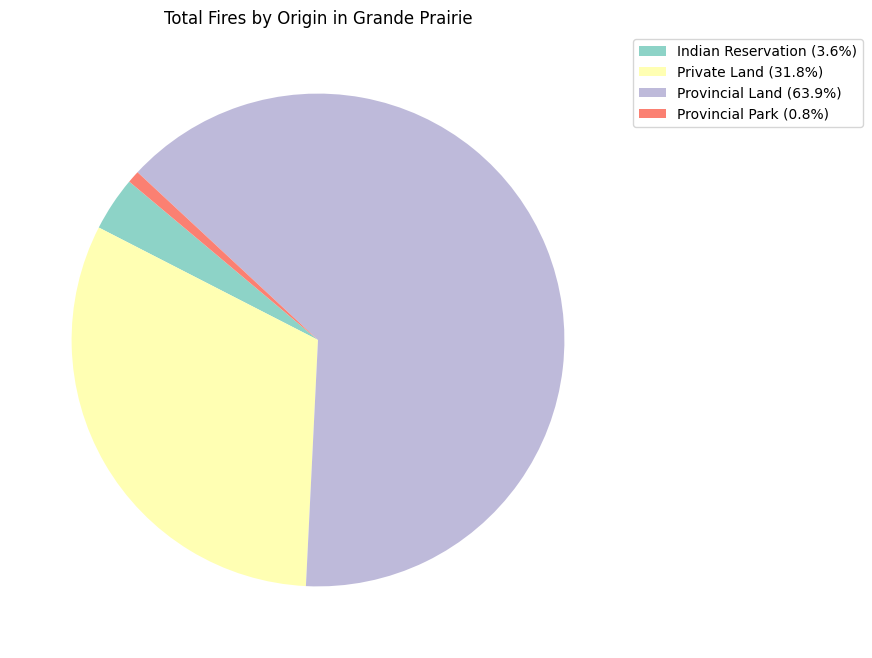

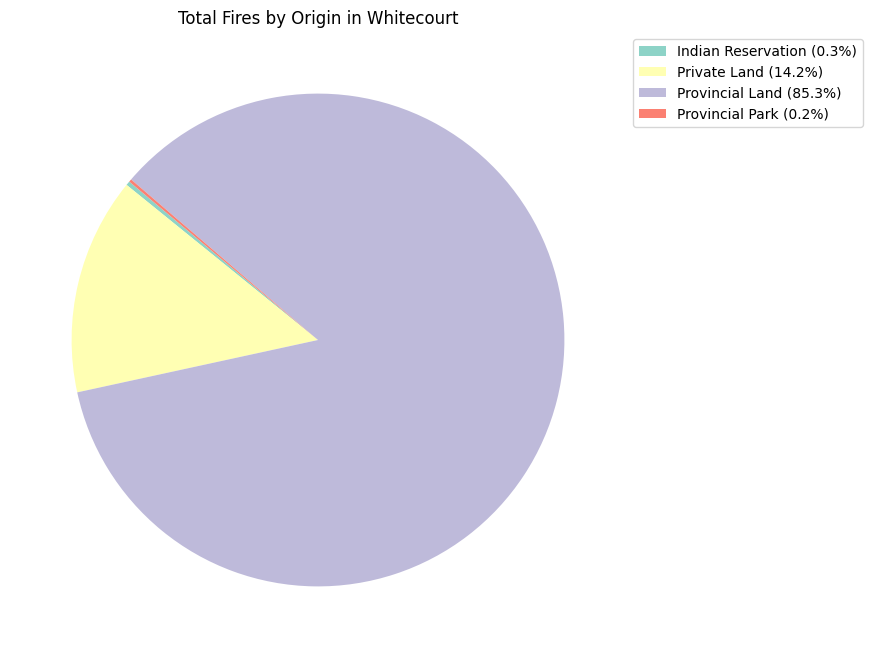

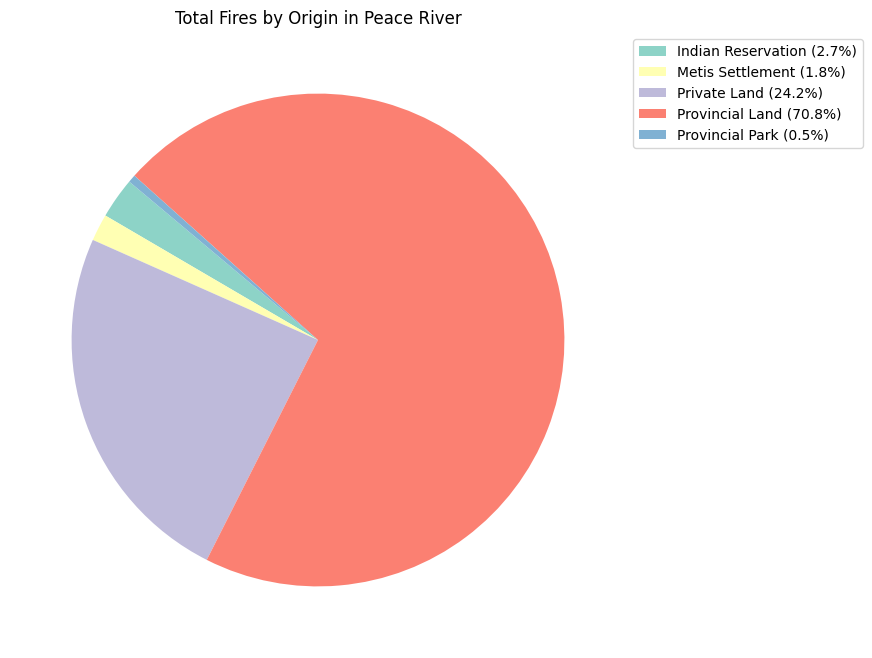

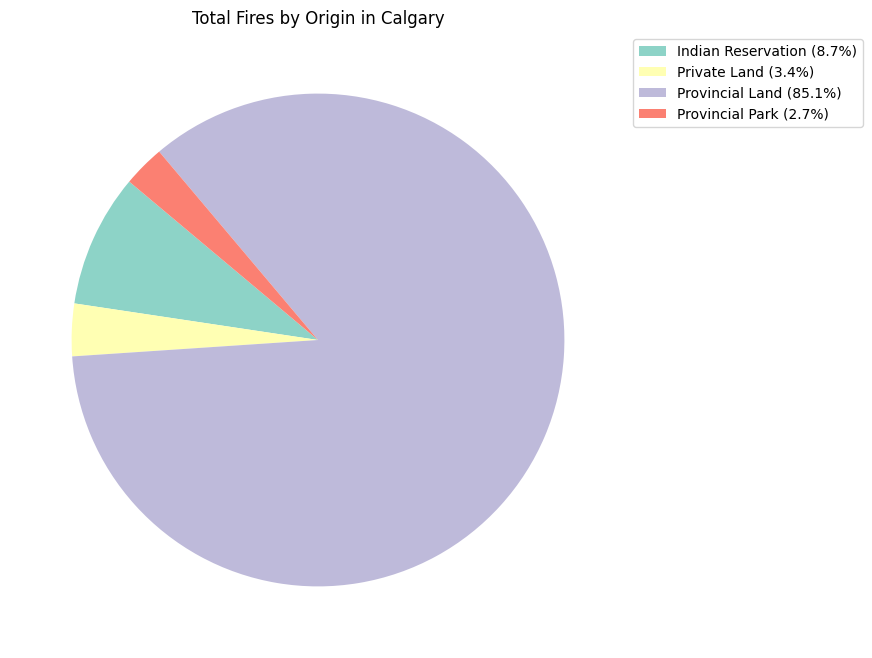

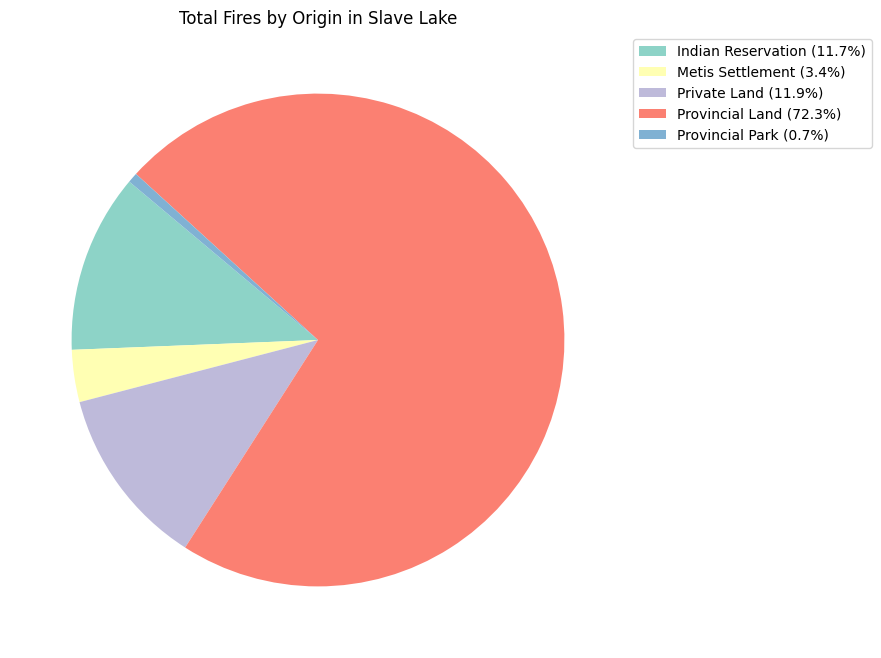

In [45]:
# Define a function to create pie chart for each region
def create_pie_chart(data, region_name, color_scheme):
    region_data = data[data['region_name'] == region_name]
    grouped_data = region_data.groupby('fire_origin').size().reset_index(name='total_fires')

    plt.figure(figsize=(8, 8))
    patches, _ = plt.pie(
        grouped_data['total_fires'],
        labels=None,  # No labels on the chart
        startangle=140,
        colors=color_scheme,
    )

    # Format legend with percentage only
    legend_labels = [f"{label} ({p:.1f}%)" for label, p in zip(grouped_data['fire_origin'], 100 * grouped_data['total_fires'] / grouped_data['total_fires'].sum())]
    plt.legend(patches, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

    plt.title(f'Total Fires by Origin in {region_name}')
    plt.show()

# Define a consistent color scheme for all pie charts
color_scheme = plt.cm.Set3.colors  # You can change the color scheme as needed

# Loop through each region and create pie chart
for region_name in wildfire_data['region_name'].unique():
    create_pie_chart(wildfire_data, region_name, color_scheme)

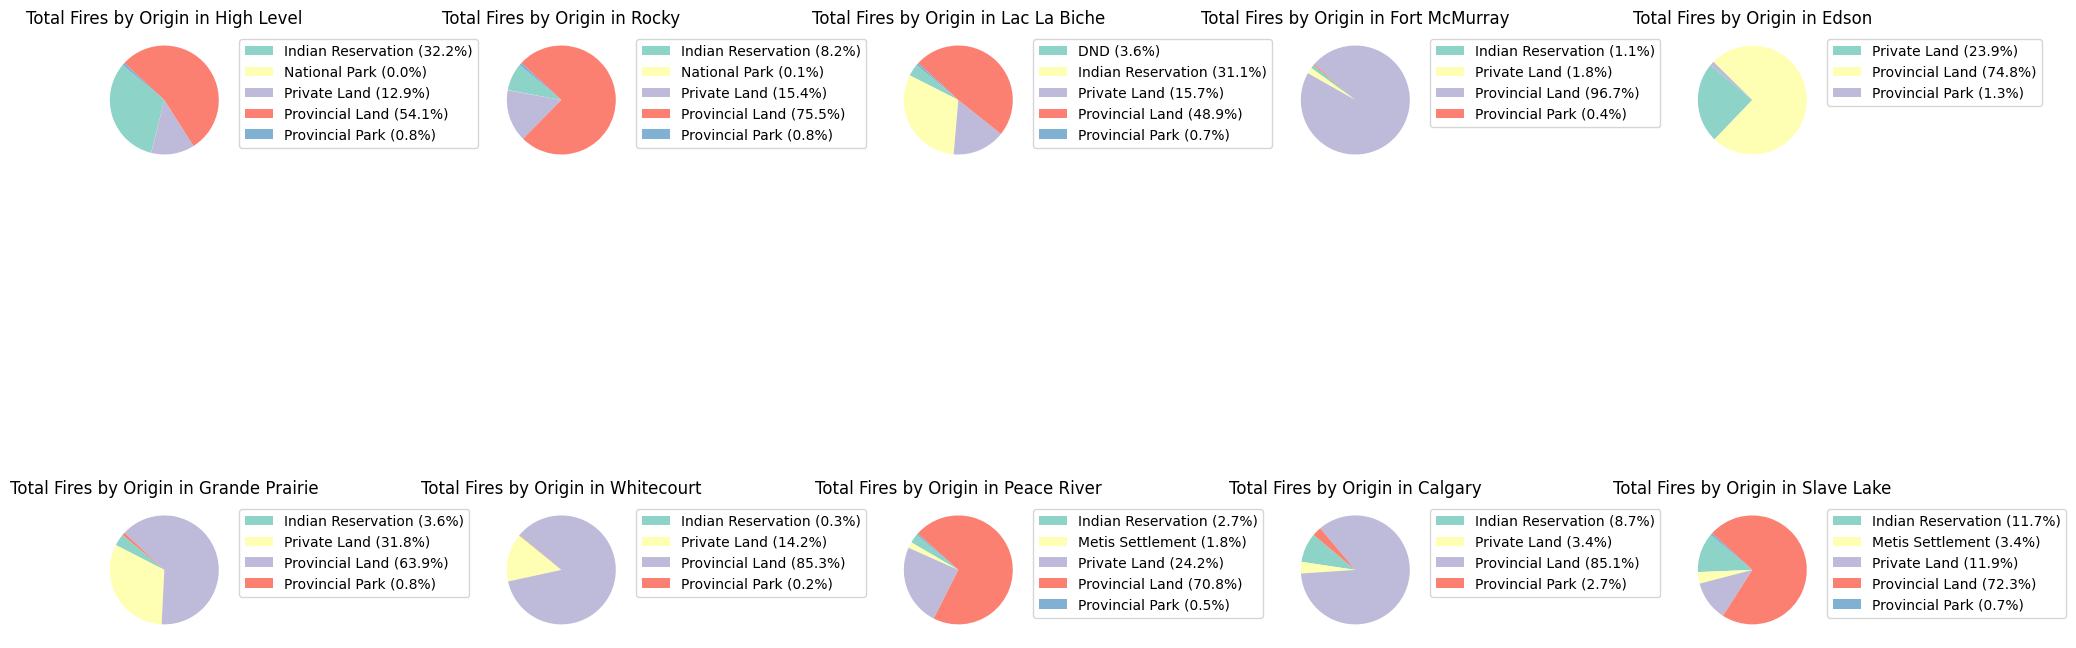

In [49]:
# Define a function to create pie chart for each region
def create_pie_chart(ax, data, region_name, color_scheme):
    region_data = data[data['region_name'] == region_name]
    grouped_data = region_data.groupby('fire_origin').size().reset_index(name='total_fires')

    ax.pie(
        grouped_data['total_fires'],
        labels=None,  # No labels on the chart
        startangle=140,
        colors=color_scheme,
    )

    # Format legend with percentage only
    legend_labels = [f"{label} ({p:.1f}%)" for label, p in zip(grouped_data['fire_origin'], 100 * grouped_data['total_fires'] / grouped_data['total_fires'].sum())]
    ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

    ax.set_title(f'Total Fires by Origin in {region_name}')

# Define a consistent color scheme for all pie charts
color_scheme = plt.cm.Set3.colors  # You can change the color scheme as needed

# Create subplots with reduced vertical space
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.subplots_adjust(hspace=0.3)  # Adjust the vertical space here
axes = axes.flatten()

# Loop through each region and create pie chart
for i, region_name in enumerate(wildfire_data['region_name'].unique()):
    create_pie_chart(axes[i], wildfire_data, region_name, color_scheme)

plt.tight_layout()
plt.show()

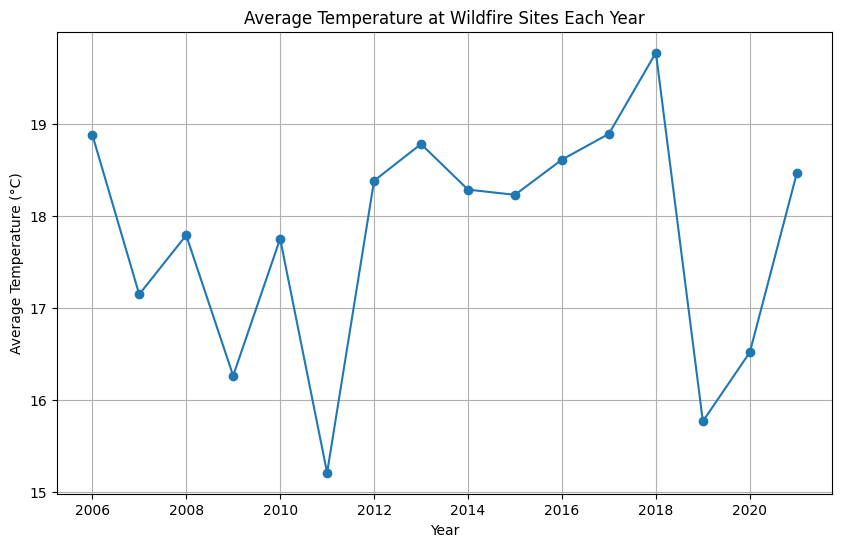

In [4]:
# Convert 'fire_year' to datetime format
wildfire_data['fire_year'] = pd.to_datetime(wildfire_data['fire_year'], format='%Y')

# Extract year from datetime
wildfire_data['year'] = wildfire_data['fire_year'].dt.year

# Group by year and calculate the average temperature
average_temperature_by_year = wildfire_data.groupby('year')['temperature'].mean()

# Plotting the average temperature each year
plt.figure(figsize=(10, 6))
plt.plot(average_temperature_by_year.index, average_temperature_by_year.values, marker='o', linestyle='-')
plt.title('Average Temperature at Wildfire Sites Each Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

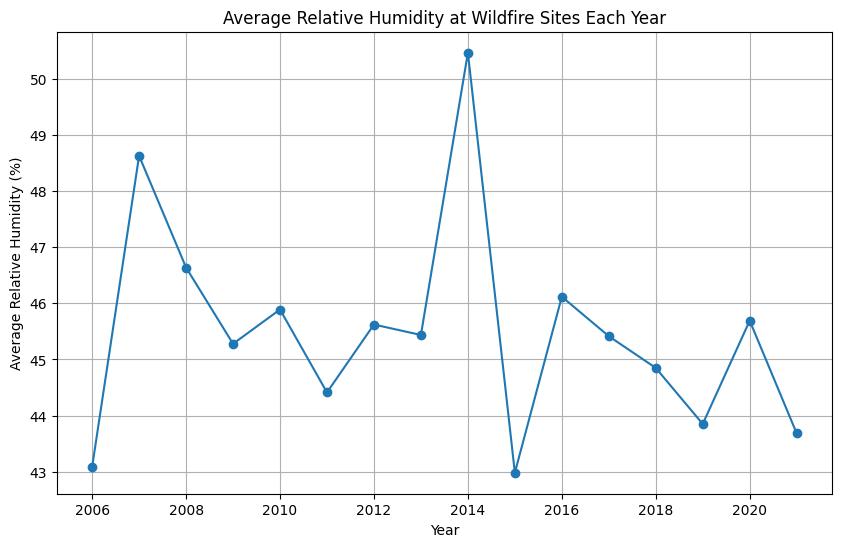

In [5]:
# Convert 'fire_year' to datetime format
wildfire_data['fire_year'] = pd.to_datetime(wildfire_data['fire_year'], format='%Y')

# Extract year from datetime
wildfire_data['year'] = wildfire_data['fire_year'].dt.year

# Group by year and calculate the average relative humidity
average_relative_humidity_by_year = wildfire_data.groupby('year')['relative_humidity'].mean()

# Plotting the average relative humidity each year
plt.figure(figsize=(10, 6))
plt.plot(average_relative_humidity_by_year.index, average_relative_humidity_by_year.values, marker='o', linestyle='-')
plt.title('Average Relative Humidity at Wildfire Sites Each Year')
plt.xlabel('Year')
plt.ylabel('Average Relative Humidity (%)')
plt.grid(True)
plt.show()

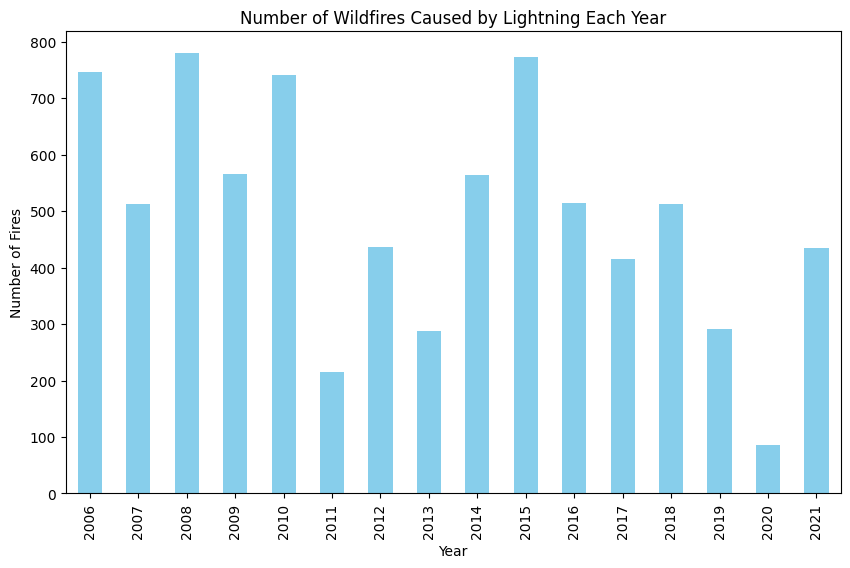

In [19]:
# Convert the 'general_cause_desc' column to uppercase
wildfire_data['general_cause_desc'] = wildfire_data['general_cause_desc'].str.upper()

# Filter data for fires caused by lightning
lightning_fires = wildfire_data[wildfire_data['general_cause_desc'] == 'LIGHTNING']

# Group by year and calculate the number of fires caused by lightning each year
lightning_by_year = lightning_fires['year'].value_counts().sort_index()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
lightning_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Wildfires Caused by Lightning Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.show()


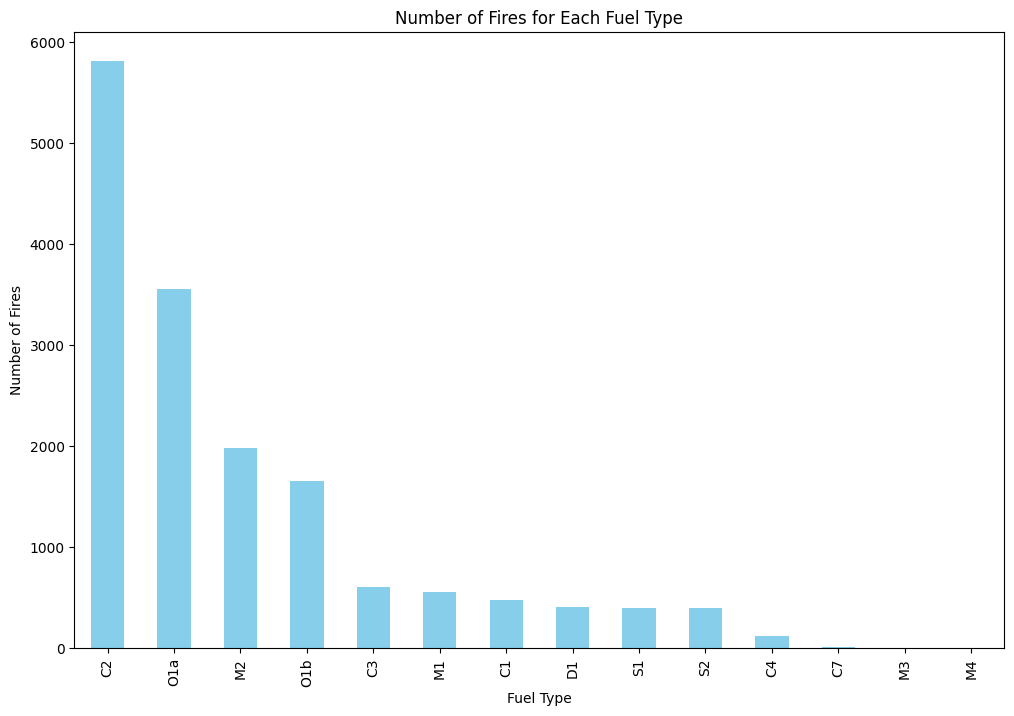

In [35]:
# Counting the number of fires for each fuel type
fires_per_fuel_type = wildfire_data['fuel_type'].value_counts()

# Plotting the bar chart
fires_per_fuel_type.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Number of Fires for Each Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Fires')
plt.show()

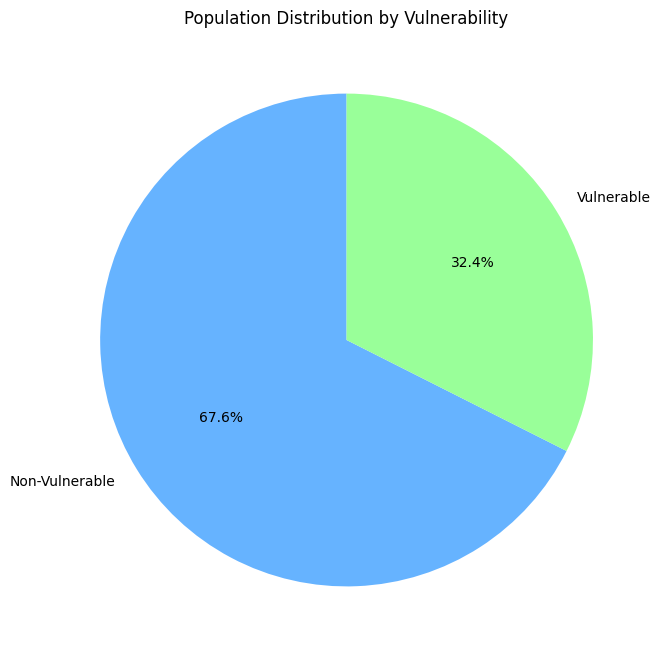

In [13]:
# Population data
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
              '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95 to 99', '100+']

population_data = [269163, 277785, 276328, 256742, 277328, 314507, 356226, 359301, 319889, 288546, 266489, 284259,
                   264339, 210073, 157657, 102977, 68565, 44033, 20921, 5746, 1002]

# Grouping into "Vulnerable" category
vulnerable_population = sum(population_data[0:3]) + sum(population_data[13:])

# Calculate total population excluding "Vulnerable" category
total_population = sum(population_data) - vulnerable_population

# Pie chart data
labels = ['Non-Vulnerable', 'Vulnerable']
sizes = [total_population, vulnerable_population]
colors = ['#66b3ff', '#99ff99']  # Blue for non-vulnerable, Green for vulnerable

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Population Distribution by Vulnerability')
plt.show()

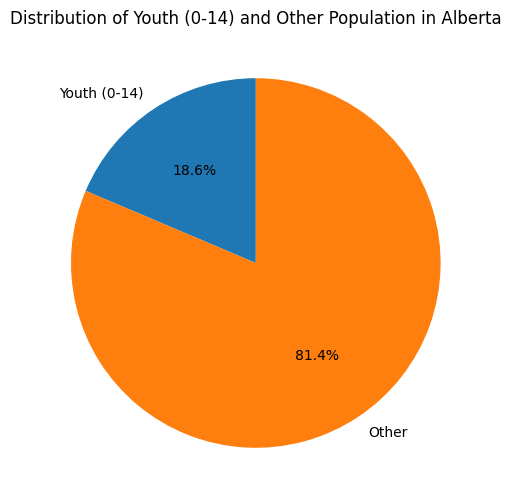

In [15]:
# Data
total_population = 4421876
youth_population = 269163 + 277785 + 276328  # Sum of 0-4, 5-9, and 10-14 age groups (from spreadsheet)

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie([youth_population, total_population - youth_population], labels=['Youth (0-14)', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Youth (0-14) and Other Population in Alberta')
plt.show()

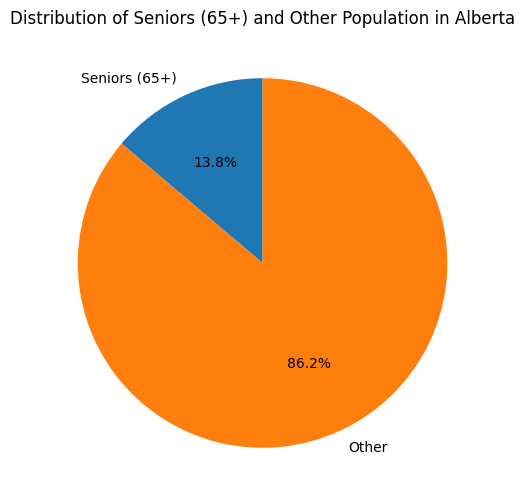

In [16]:
# Data
total_population = 4421876
senior_population = 210073 + 157657 + 102977 + 68565 + 44033 + 20921 + 5746 + 1002  # Sum of 65+ age groupsv (from spreadsheet)

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie([senior_population, total_population - senior_population], labels=['Seniors (65+)', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Seniors (65+) and Other Population in Alberta')
plt.show()

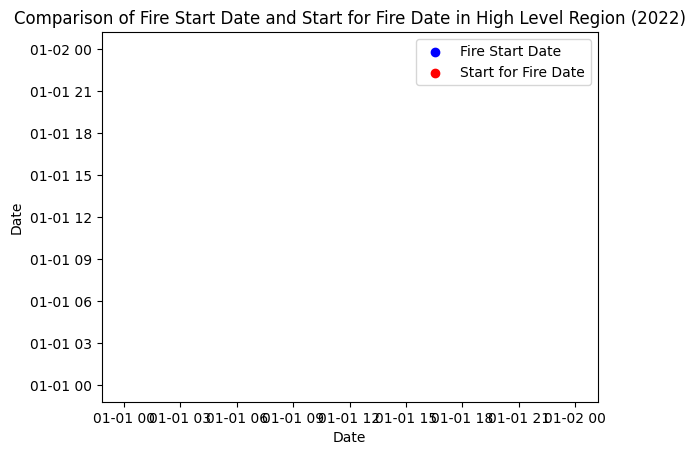

In [7]:
# Extract the region from the first letter of 'fire_number'
wildfire_data['region'] = wildfire_data['fire_number'].str[0]

# Convert date columns to datetime format, handling errors
wildfire_data['fire_start_date'] = pd.to_datetime(wildfire_data['fire_start_date'], errors='coerce')
wildfire_data['start_for_fire_date'] = pd.to_datetime(wildfire_data['start_for_fire_date'], errors='coerce')

# Filter data for 'High Level' region and fires in 2022
high_level_data_2022 = wildfire_data[(wildfire_data['region'] == 'H') & (wildfire_data['fire_start_date'].dt.year == 2022)]

# Exclude rows with missing or invalid dates
high_level_data_2022 = high_level_data_2022.dropna(subset=['fire_start_date', 'start_for_fire_date'])

# Create a scatter plot to compare 'fire_start_date' and 'start_for_fire_date'
plt.scatter(high_level_data_2022['fire_start_date'], high_level_data_2022['start_for_fire_date'], color='blue', label='Fire Start Date')
plt.scatter(high_level_data_2022['start_for_fire_date'], high_level_data_2022['fire_start_date'], color='red', label='Start for Fire Date')

# Connect pairs with lines
for i in range(len(high_level_data_2022)):
    plt.plot([high_level_data_2022['fire_start_date'].iloc[i], high_level_data_2022['start_for_fire_date'].iloc[i]],
             [high_level_data_2022['start_for_fire_date'].iloc[i], high_level_data_2022['fire_start_date'].iloc[i]], color='gray', linestyle='--')

plt.title('Comparison of Fire Start Date and Start for Fire Date in High Level Region (2022)')
plt.xlabel('Date')
plt.ylabel('Date')
plt.legend()
plt.show()

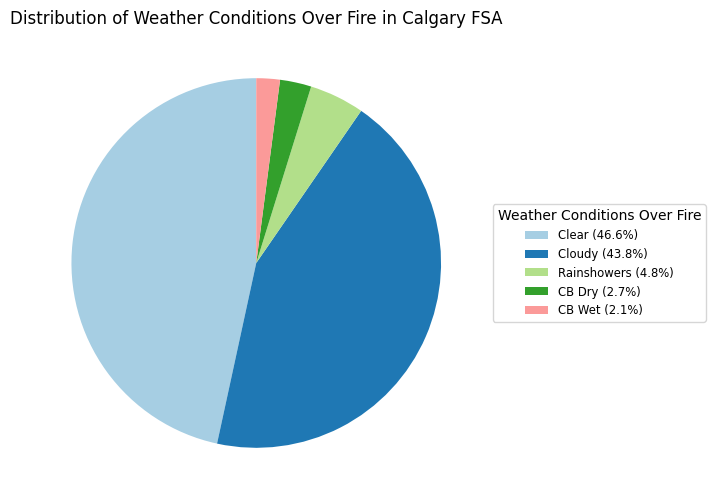

In [9]:
calgary_data = wildfire_data[wildfire_data['fire_number'].str[0] == 'C']

# Group by weather_conditions_over_fire and count occurrences
weather_counts = calgary_data['weather_conditions_over_fire'].value_counts()

# Plotting the pie chart without text and percentages
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired.colors
pie = plt.pie(weather_counts, autopct='', startangle=90, colors=colors)

# Adding a legend with percentages
legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(weather_counts.index, weather_counts / weather_counts.sum() * 100)]
plt.legend(legend_labels, title='Weather Conditions Over Fire', bbox_to_anchor=(1, 0.5), loc="center left", fontsize='small')

plt.title('Distribution of Weather Conditions Over Fire in Calgary FSA')
plt.show()

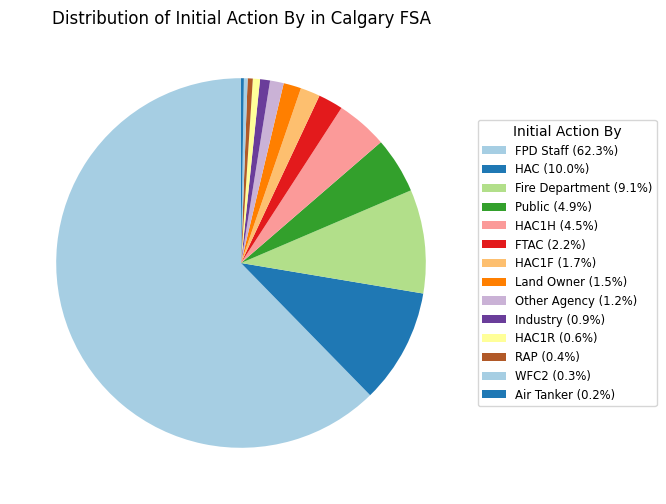

In [10]:
calgary_data = wildfire_data[wildfire_data['fire_number'].str[0] == 'C']

# Group by initial_action_by and count occurrences
action_counts = calgary_data['initial_action_by'].value_counts()

# Plotting  pie chart without text and percentages
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired.colors
pie = plt.pie(action_counts, autopct='', startangle=90, colors=colors)

# Adding legend with percentages
legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(action_counts.index, action_counts / action_counts.sum() * 100)]
plt.legend(legend_labels, title='Initial Action By', bbox_to_anchor=(1, 0.5), loc="center left", fontsize='small')

plt.title('Distribution of Initial Action By in Calgary FSA')
plt.show()

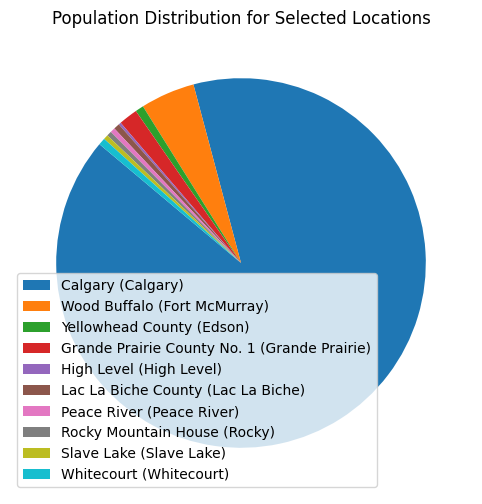

In [12]:
# Population data
populations = [1413800, 74532, 11438, 25928, 3293, 8187, 6662, 6603, 6377, 9586]
locations = ["Calgary (Calgary)", "Wood Buffalo (Fort McMurray)", "Yellowhead County (Edson)",
             "Grande Prairie County No. 1 (Grande Prairie)", "High Level (High Level)", 
             "Lac La Biche County (Lac La Biche)", "Peace River (Peace River)", 
             "Rocky Mountain House (Rocky)", "Slave Lake (Slave Lake)", "Whitecourt (Whitecourt)"]

# Plotting  pie chart
plt.figure(figsize=(10, 6))
plt.pie(populations, labels=['']*len(locations), startangle=140)
plt.title('Population Distribution for Selected Locations')
plt.legend(locations, loc='best')
plt.show()

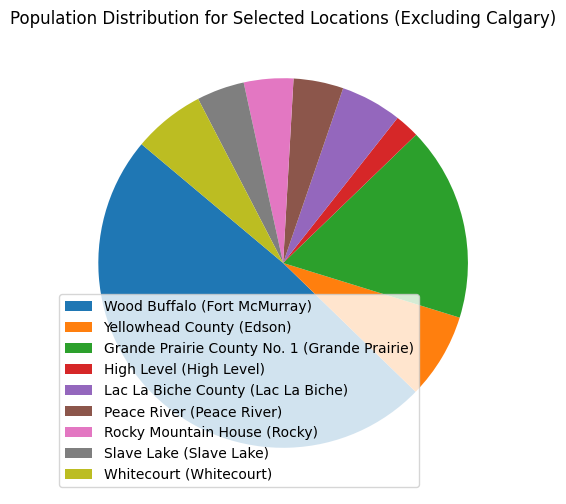

In [10]:
# Population data excluding Calgary
populations = [74532, 11438, 25928, 3293, 8187, 6662, 6603, 6377, 9586]
locations = ["Wood Buffalo (Fort McMurray)", "Yellowhead County (Edson)",
             "Grande Prairie County No. 1 (Grande Prairie)", "High Level (High Level)", 
             "Lac La Biche County (Lac La Biche)", "Peace River (Peace River)", 
             "Rocky Mountain House (Rocky)", "Slave Lake (Slave Lake)", "Whitecourt (Whitecourt)"]

# Plotting  pie chart
plt.figure(figsize=(10, 6))
plt.pie(populations, labels=['']*len(locations), startangle=140)
plt.title('Population Distribution for Selected Locations (Excluding Calgary)')
plt.legend(locations, loc='best')
plt.show()